# Implement a Simple Linear Regression  `f(x) = w*x+b` from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  sklearn.linear_model import LinearRegression as sk_LinearRegression

In [2]:
data=pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
y=data['#Passengers'].values
y.shape

(144,)

In [4]:
x=np.arange(0, 144) # the indexes of the time points
x=x.astype("float64")

In [5]:
sk_model=sk_LinearRegression()
sk_model.fit(x.reshape(144,1), y)

LinearRegression()

In [6]:
y_pred=sk_model.predict(x.reshape(144,1))

In [7]:
# y_pred = w*x+b
# w is sk_model.coef_
# b is sk_model.intercept_

In [8]:
w=sk_model.coef_.item()
w

2.6571839080459774

In [9]:
b=sk_model.intercept_
b

90.30996168582371

Text(0, 0.5, 'y_pred')

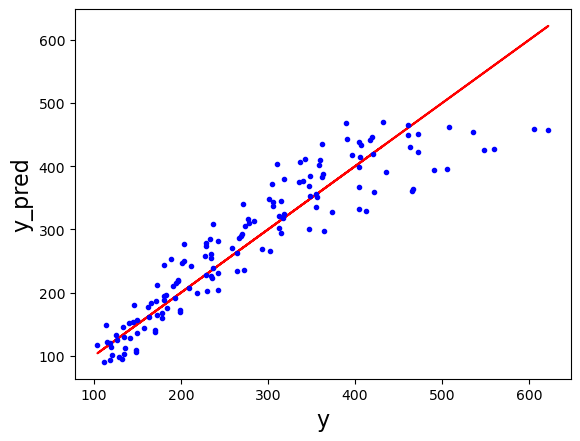

In [10]:
fig, ax = plt.subplots()
ax.plot(y, y, '-r')
ax.plot(y, y_pred, '.b')
ax.set_xlabel('y', fontsize=16)
ax.set_ylabel('y_pred', fontsize=16)

Text(0.5, 1.0, 'blue line: y_pred=2.6571839080459774 * x + 90.30996168582371')

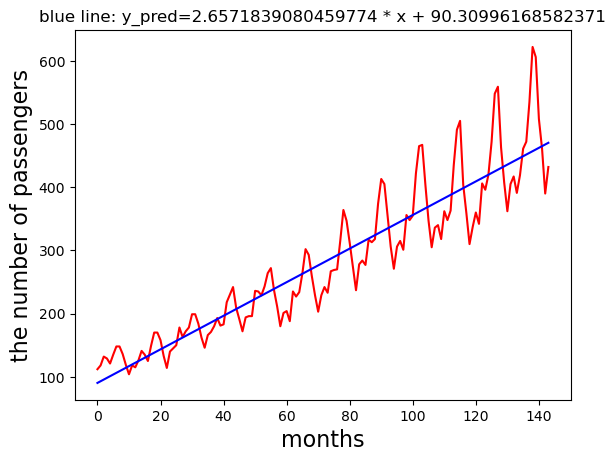

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y, '-r')
ax.plot(x, y_pred, '-b')
ax.set_xlabel('months', fontsize=16)
ax.set_ylabel('the number of passengers', fontsize=16)
ax.set_title('blue line: y_pred='+str(w)+' * x + '+str(b), fontsize=12)

Text(0.5, 1.0, 'green curve: y-(w*x+b)')

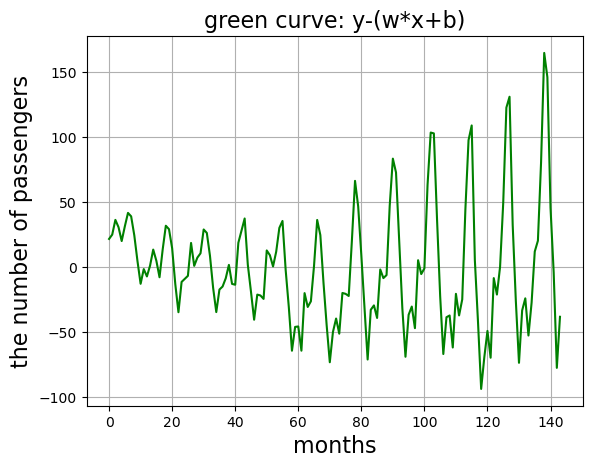

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y-y_pred, '-g')
ax.grid(True)
ax.set_xlabel('months', fontsize=16)
ax.set_ylabel('the number of passengers', fontsize=16)
ax.set_title('green curve: y-(w*x+b)', fontsize=16)

Text(0.5, 0, 'months')

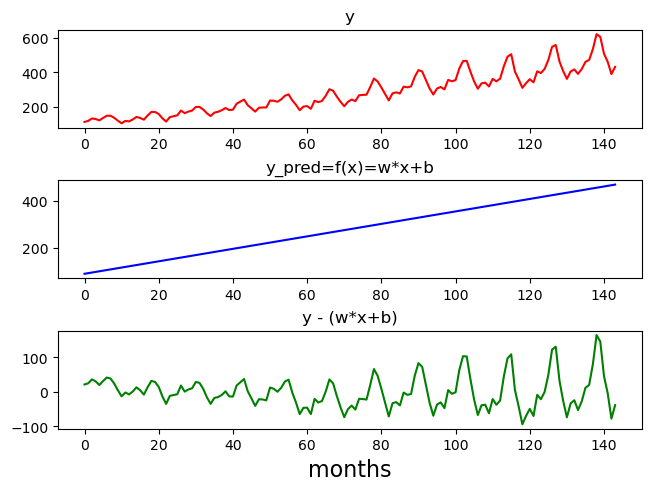

In [13]:
fig, ax = plt.subplots(3,1,constrained_layout=True)
ax[0].plot(x, y, '-r')
ax[0].set_title('y')
ax[1].plot(x, y_pred, '-b')
ax[1].set_title('y_pred=f(x)=w*x+b')
ax[2].plot(x, y-y_pred, '-g')
ax[2].set_title('y - (w*x+b)')
ax[2].set_xlabel('months', fontsize=16)

## Let's implement the simple linear regression using gradient descent

### gradient descent
L is loss \
w <= w - learning_rate * dL/dw \
b <= b - learning_rate * dL/db

In [14]:
#random initialziation
w=np.random.randn()
b=np.random.randn()

In [15]:
#total loss
L = ((y - w*x-b)**2).mean()
L

103392.56834177057

In [16]:
#gradient
dL_dw = -2*((y-w*x-b)*x).mean()
dL_dw

-52095.54515059618

In [17]:
#gradient
dL_db = -2*(y-w*x-b).mean()
dL_db

-590.7188231108173

In [18]:
class MyLinearRegression:
    def __init__(self, learning_rate, max_iter):
        self.learning_rate=learning_rate
        self.max_iter=max_iter
        self.w=None
        self.b=None
    def fit(self, X, Y):
        #X.shape (N, 1)
        #Y.shape (N,)
        #find the best values of w and b        
        self.w=np.random.randn()
        self.b=np.random.randn()        
        for i in range(0, self.max_iter):
            dL_dw= -2*((y-self.w*x-self.b)*x).mean()
            dL_db= -2*((y-self.w*x-self.b)).mean()
            self.w=self.w - self.learning_rate * dL_dw
            self.b=self.b - self.learning_rate * dL_db            
            
    def predict(self, X):
        #X.shape (N, 1)
        X=X.reshape(-1)
        Y_pred = self.w*X+self.b
        return Y_pred        

In [19]:
my_model=MyLinearRegression(learning_rate=1e-4, max_iter=1000000)
my_model.fit(x.reshape(144,1), y)
my_y_pred=my_model.predict(x.reshape(144,1))

In [20]:
my_model.w

2.6571839080474473

In [21]:
my_model.b

90.3099616856831

Text(0, 0.5, 'my_y_pred')

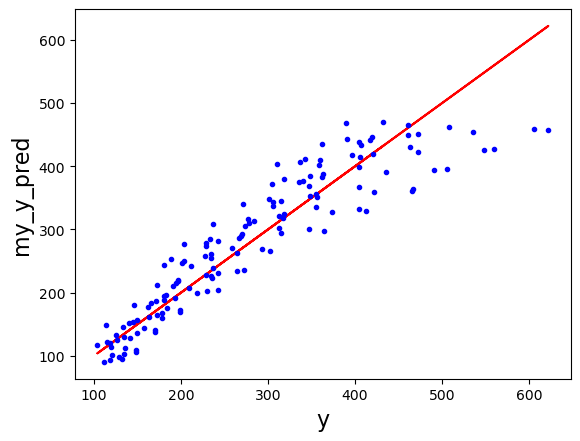

In [22]:
fig, ax = plt.subplots()
ax.plot(y, y, '-r')
ax.plot(y, my_y_pred, '.b')
ax.set_xlabel('y', fontsize=16)
ax.set_ylabel('my_y_pred', fontsize=16)

In [23]:
difference=np.mean(np.abs(my_y_pred-y_pred)/np.abs(y_pred))
difference

3.320864944070775e-13